## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import AdaBoostClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
import lightgbm as lgb

## Read Data

In [2]:
df = pd.read_csv("/kaggle/input/credictcardfraud/creditcard.csv")

## Check Data

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Data Exploration

In [4]:
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

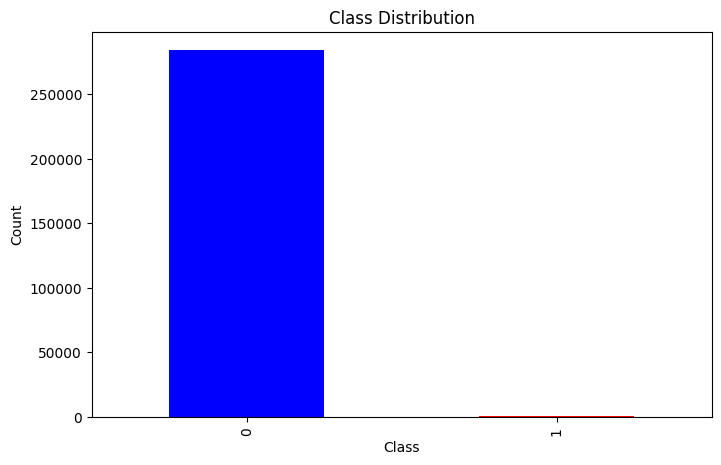

In [5]:
plt.figure(figsize = (8,5))
df['Class'].value_counts().plot(kind = 'bar',color = ['blue','red'])
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

#### Check Missing Data

In [6]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [8]:
df.isnull().sum()/df.isnull().count()*100

Time      0.0
V1        0.0
V2        0.0
V3        0.0
V4        0.0
V5        0.0
V6        0.0
V7        0.0
V8        0.0
V9        0.0
V10       0.0
V11       0.0
V12       0.0
V13       0.0
V14       0.0
V15       0.0
V16       0.0
V17       0.0
V18       0.0
V19       0.0
V20       0.0
V21       0.0
V22       0.0
V23       0.0
V24       0.0
V25       0.0
V26       0.0
V27       0.0
V28       0.0
Amount    0.0
Class     0.0
dtype: float64

In [9]:
df.shape

(284807, 31)

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.168375e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.416908e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.379537e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.074095e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,9.604066e-16,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.487313e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.556467e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,1.213481e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-2.406331e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


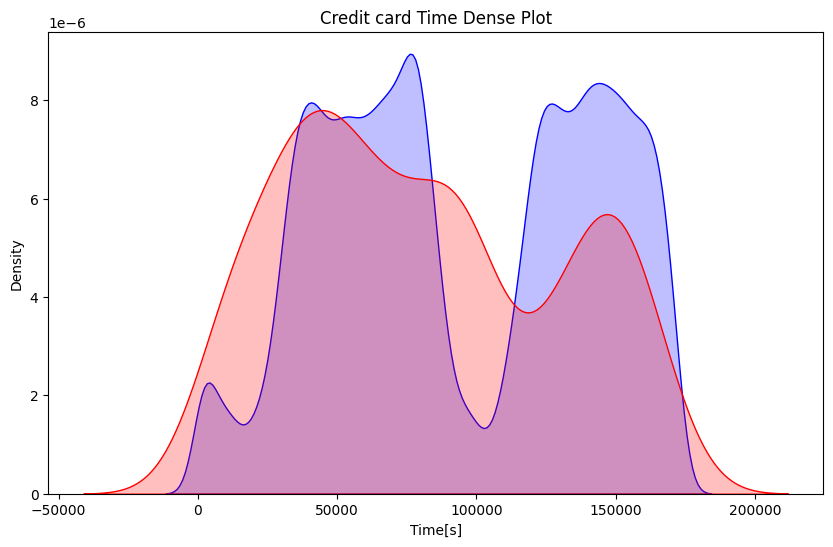

In [7]:
class_0 = df.loc[df['Class'] == 0]['Time']
class_1 = df.loc[df['Class'] == 1]['Time']

plt.figure(figsize=(10,6))
sns.kdeplot(class_0,label = 'Not Fraud',color = 'blue',fill = True)
sns.kdeplot(class_1,label = 'Fraud',color = 'red',fill = True)
plt.title('Credit card Time Dense Plot')
plt.xlabel('Time[s]')
plt.ylabel('Density')
plt.show()

In [8]:
df['Hour'] = df['Time'].apply(lambda x: np.floor(x/3600))

tmp = df.groupby(['Hour','Class'])['Amount'].agg(['min','max','count',
                                                  'sum','mean','median','var']).reset_index()
tmp_df = pd.DataFrame(tmp)
tmp_df.columns = ['Hour', 'Class', 'Min', 'Max', 'Transactions', 'Sum', 'Mean', 'Median', 'Var']
tmp_df.head()

,Hour,Class,Min,Max,Transactions,Sum,Mean,Median,Var
0,0.0,0,0.0,7712.43,3961,256572.87,64.774772,12.990,45615.821201
1,0.0,1,0.0,529.00,2,529.00,264.500000,264.500,139920.500000
2,1.0,0,0.0,1769.69,2215,145806.76,65.826980,22.820,20053.615770
3,1.0,1,59.0,239.93,2,298.93,149.465000,149.465,16367.832450
4,2.0,0,0.0,4002.88,1555,106989.39,68.803466,17.900,45355.430437


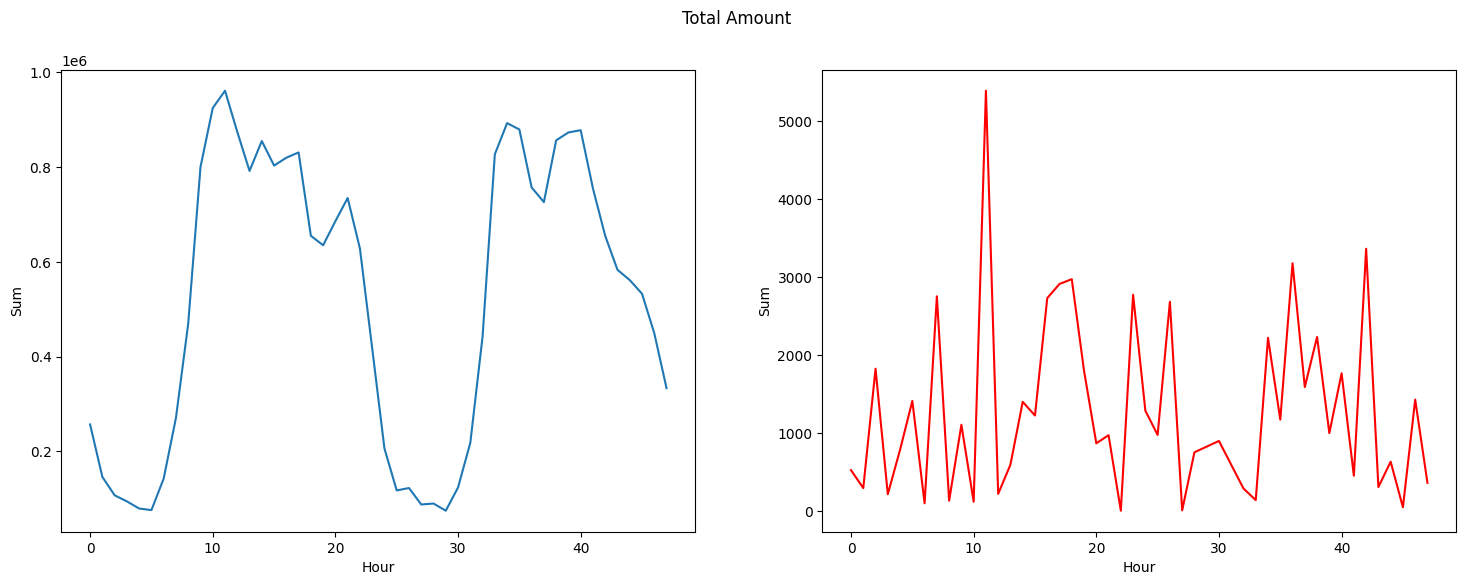

In [9]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))
s = sns.lineplot(ax = ax1, x="Hour", y="Sum", data=tmp_df.loc[tmp_df.Class==0])
s = sns.lineplot(ax = ax2, x="Hour", y="Sum", data=tmp_df.loc[tmp_df.Class==1], color="red")
plt.suptitle("Total Amount")
plt.show()

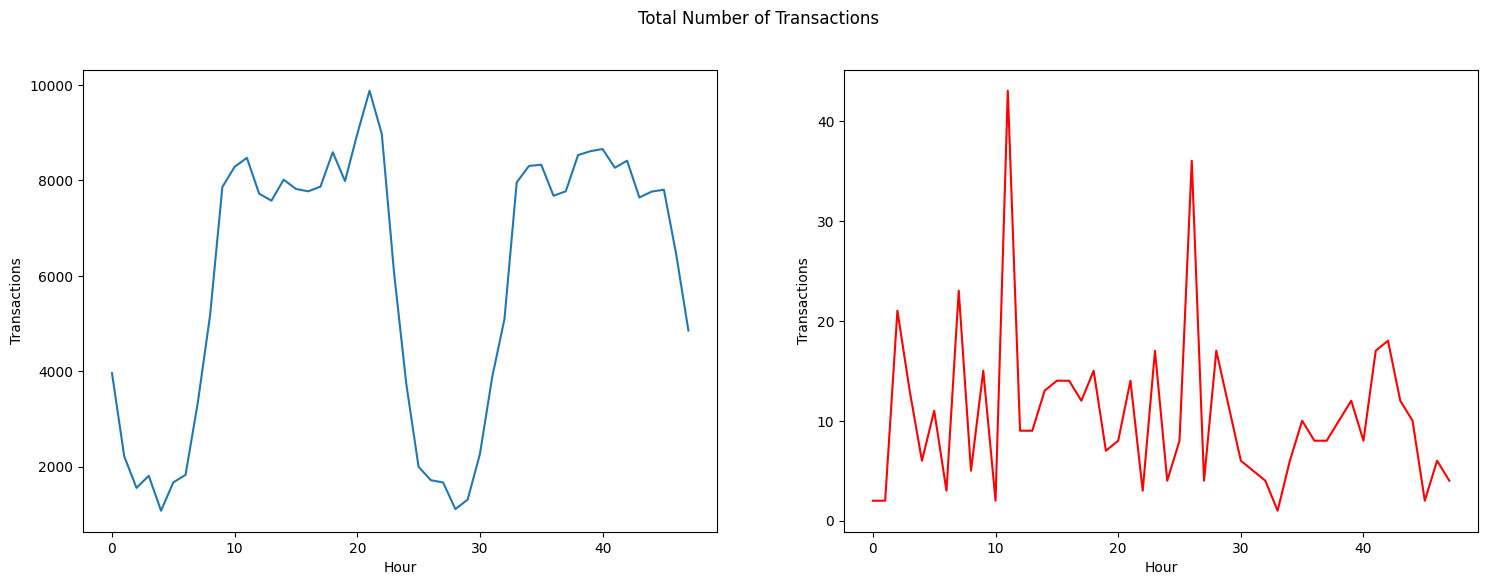

In [14]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))
s = sns.lineplot(ax = ax1, x="Hour", y="Transactions", data=tmp_df.loc[tmp_df.Class==0])
s = sns.lineplot(ax = ax2, x="Hour", y="Transactions", data=tmp_df.loc[tmp_df.Class==1], color="red")
plt.suptitle("Total Number of Transactions")
plt.show();

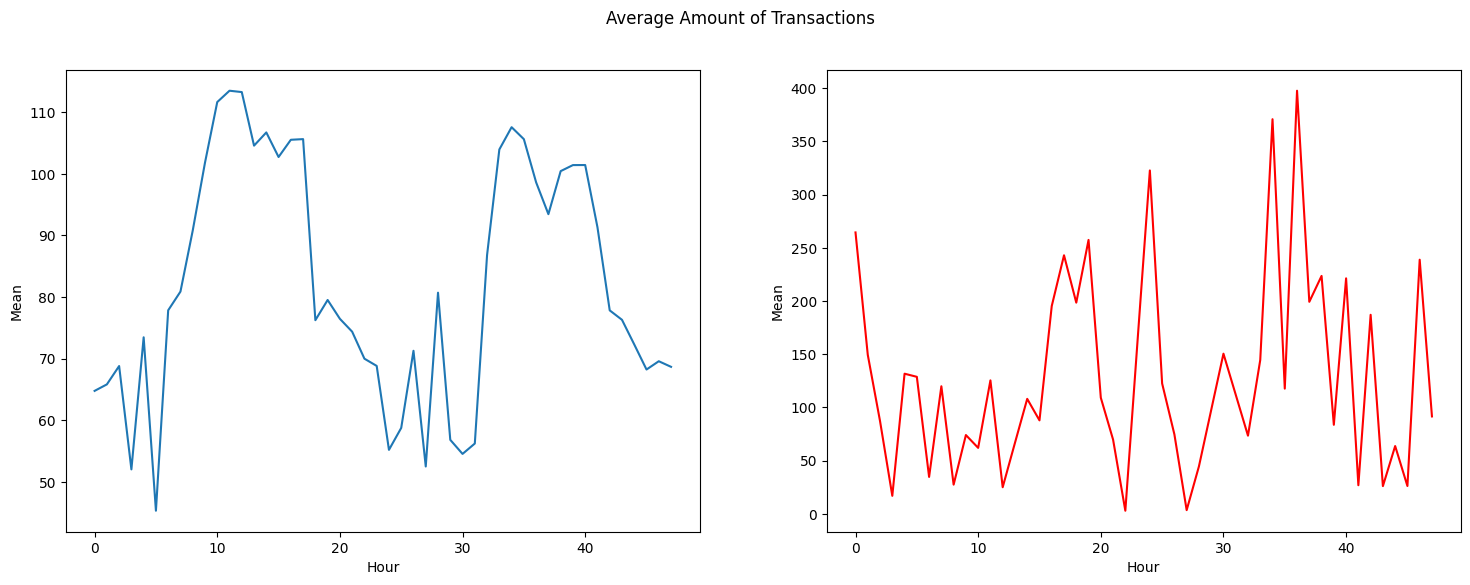

In [15]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))
s = sns.lineplot(ax = ax1, x="Hour", y="Mean", data=tmp_df.loc[tmp_df.Class==0])
s = sns.lineplot(ax = ax2, x="Hour", y="Mean", data=tmp_df.loc[tmp_df.Class==1], color="red")
plt.suptitle("Average Amount of Transactions")
plt.show();

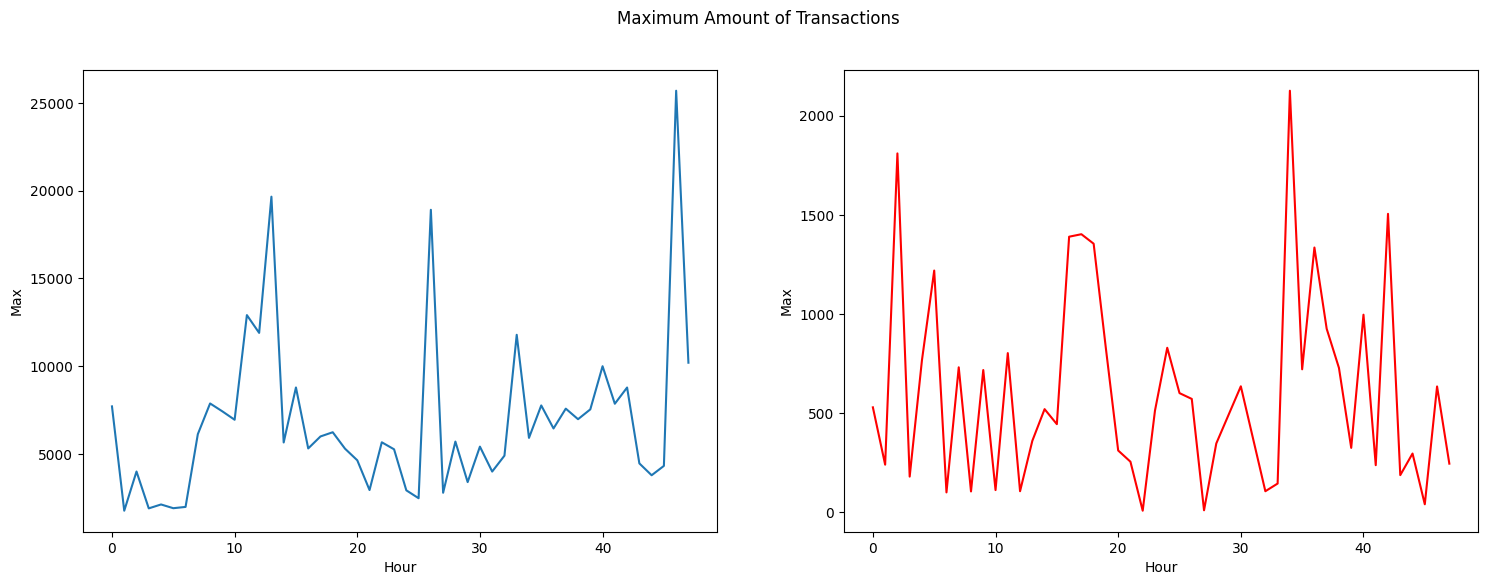

In [16]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))
s = sns.lineplot(ax = ax1, x="Hour", y="Max", data=tmp_df.loc[tmp_df.Class==0])
s = sns.lineplot(ax = ax2, x="Hour", y="Max", data=tmp_df.loc[tmp_df.Class==1], color="red")
plt.suptitle("Maximum Amount of Transactions")
plt.show()

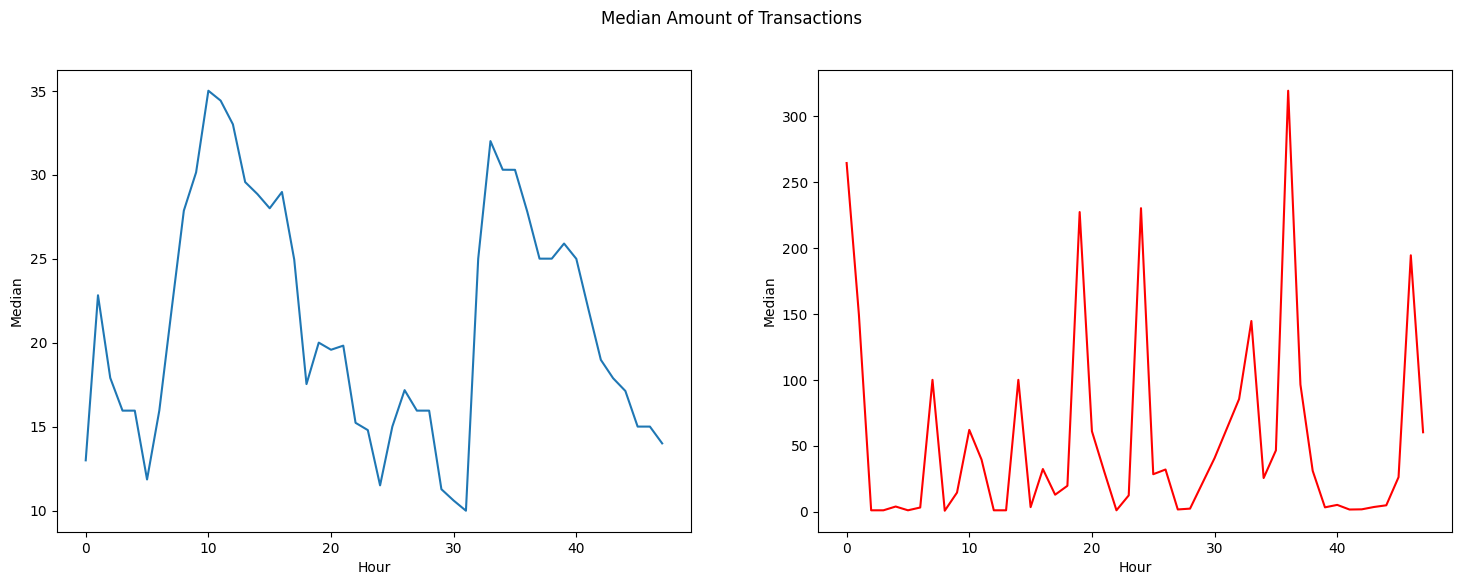

In [17]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))
s = sns.lineplot(ax = ax1, x="Hour", y="Median", data=tmp_df.loc[tmp_df.Class==0])
s = sns.lineplot(ax = ax2, x="Hour", y="Median", data=tmp_df.loc[tmp_df.Class==1], color="red")
plt.suptitle("Median Amount of Transactions")
plt.show();

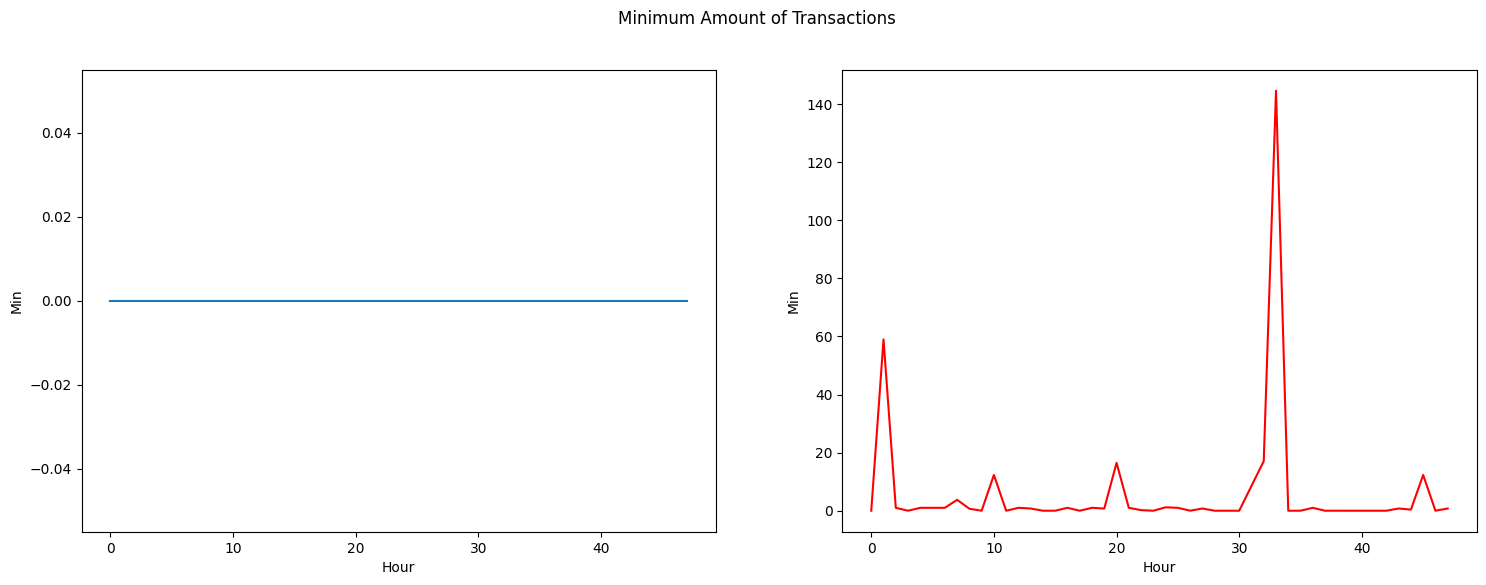

In [18]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))
s = sns.lineplot(ax = ax1, x="Hour", y="Min", data=tmp_df.loc[tmp_df.Class==0])
s = sns.lineplot(ax = ax2, x="Hour", y="Min", data=tmp_df.loc[tmp_df.Class==1], color="red")
plt.suptitle("Minimum Amount of Transactions")
plt.show();

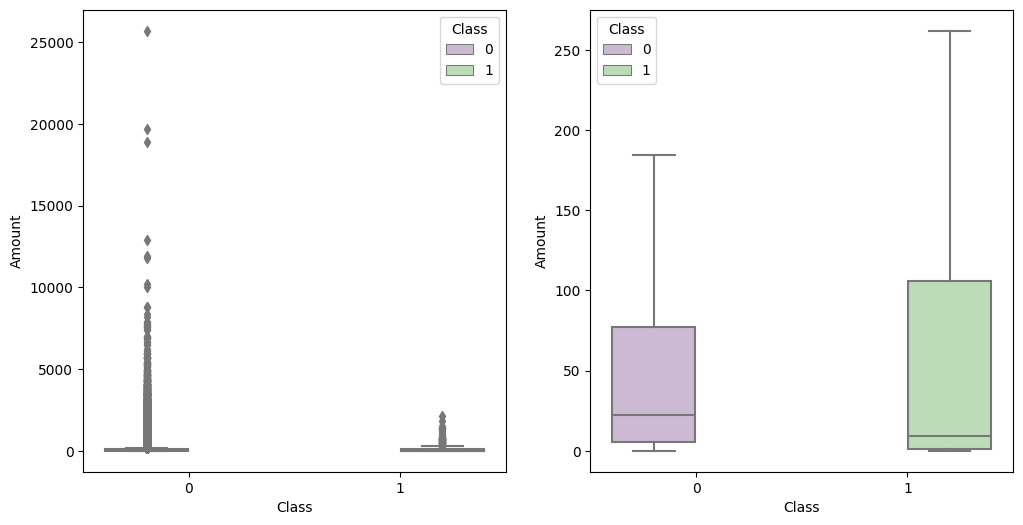

In [19]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
s = sns.boxplot(ax = ax1, x="Class", y="Amount", hue="Class",data=df, palette="PRGn",showfliers=True)
s = sns.boxplot(ax = ax2, x="Class", y="Amount", hue="Class",data=df, palette="PRGn",showfliers=False)
plt.show();

In [10]:
tmp = df[['Amount','Class']].copy()
class_0 = tmp.loc[tmp['Class'] == 0]['Amount']
class_1 = tmp.loc[tmp['Class'] == 1]['Amount']
class_0.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [11]:
class_1.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

### The real transaction have a larger mean value, larger Q1, smaller Q3 and Q4 and larger outliers; fraudulent transactions have a smaller Q1 and mean, larger Q4 and smaller outliers.

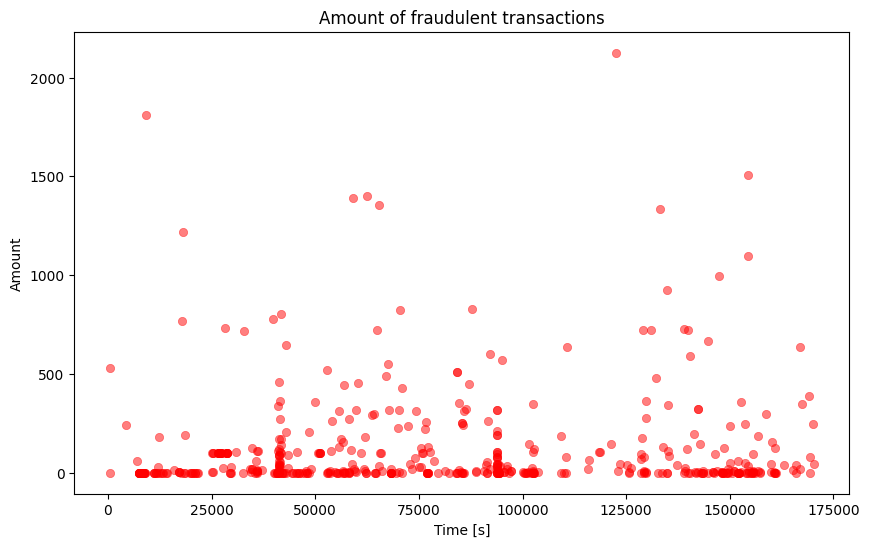

In [13]:
fraud = df.loc[df['Class'] == 1]

plt.figure(figsize=(10, 6))

sns.scatterplot(x=fraud['Time'], y=fraud['Amount'], color='red', alpha=0.5, edgecolor='red')
plt.title('Amount of fraudulent transactions')
plt.xlabel('Time [s]')
plt.ylabel('Amount')

plt.show()


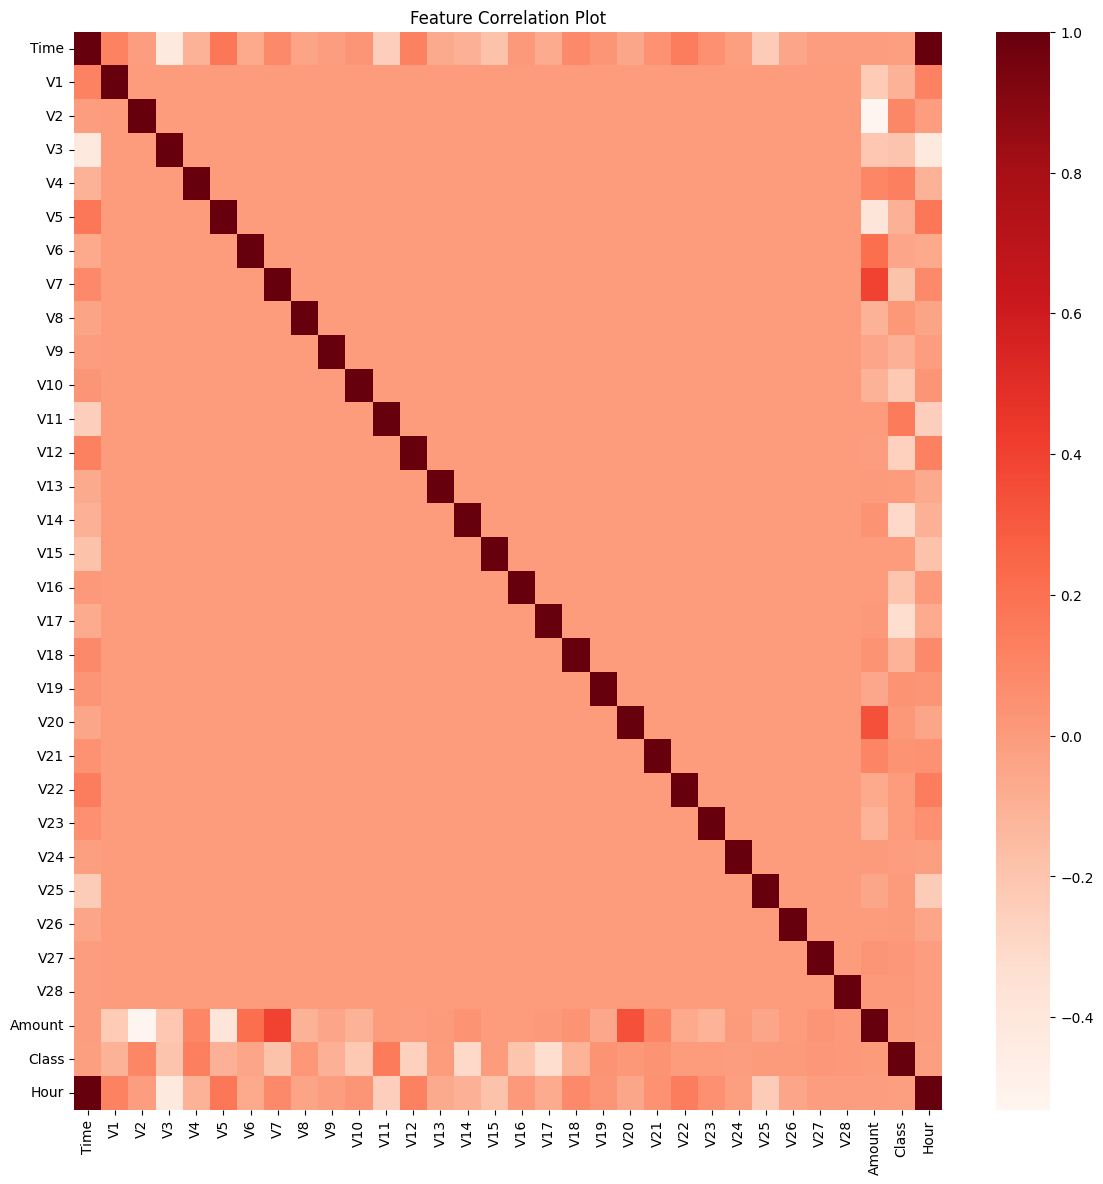

In [14]:
plt.figure(figsize= (14,14))
plt.title('Feature Correlation Plot')
sns.heatmap(df.corr(), cmap = 'Reds')
plt.show()

#### As expected, there is no notable correlation between features V1-V28. There are certain correlations between some of these features and Time (inverse correlation with V3) and Amount (direct correlation with V7 and V20, inverse correlation with V1 and V5), direct correlation with Time and Hour.

## Model Building

In [15]:
x = df.drop('Class',axis = 1)
y = df['Class']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3, random_state = 42)

## SMOTE to balance the imbalanced dataset.

In [16]:
smote = SMOTE(sampling_strategy='auto', random_state=42)
x_train, y_train = smote.fit_resample(x_train, y_train)

## Model 1: RandomForestClassifier

In [17]:
clf = RandomForestClassifier(n_jobs =4, random_state = 42,
                            criterion = 'gini', n_estimators = 100,
                            verbose = False)

In [18]:
clf.fit(x_train, y_train)

RandomForestClassifier(n_jobs=4, random_state=42, verbose=False)

In [19]:
y_pred = clf.predict(x_test)

In [20]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.9995084442259752


In [21]:
roc_auc_score(y_test,y_pred)

0.9336828610023727

## Feature Selection

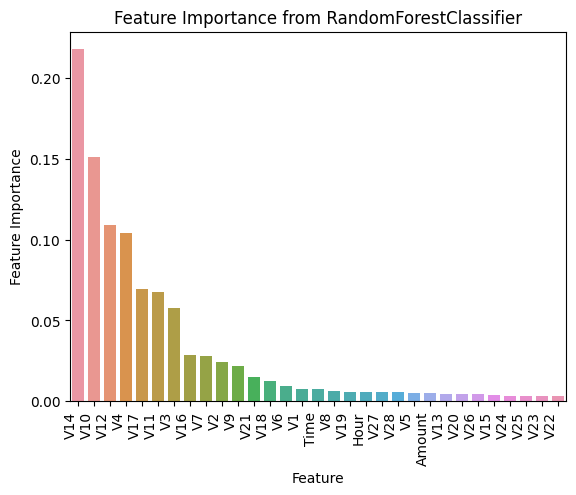

In [22]:
tmp = pd.DataFrame({'Feature': x_train.columns, 'Feature Importance' : clf.feature_importances_})
tmp = tmp.sort_values(by = 'Feature Importance', ascending = False)
s = sns.barplot(x = 'Feature',y = 'Feature Importance', data = tmp)
plt.title('Feature Importance from RandomForestClassifier')
plt.xticks(rotation = 90, ha = 'right')
plt.show()

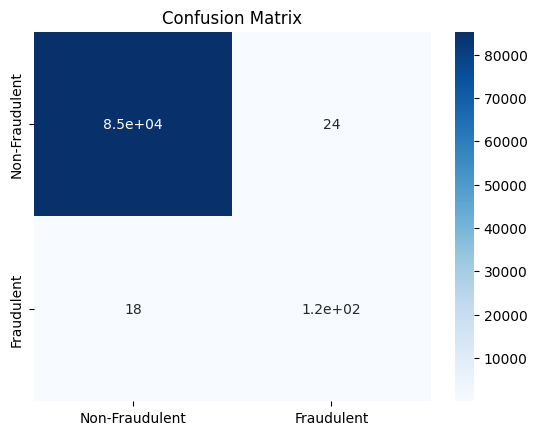

In [23]:
conf_matrix = confusion_matrix(y_test,y_pred)
sns.heatmap(conf_matrix, annot=True, cmap='Blues',
            xticklabels=['Non-Fraudulent', 'Fraudulent'],
            yticklabels=['Non-Fraudulent', 'Fraudulent'])
plt.title('Confusion Matrix')
plt.show();

# Model 2: AdaBoostClassifier

In [38]:
clf = AdaBoostClassifier(random_state=32,
                         algorithm='SAMME.R',
                         learning_rate=0.8,
                         n_estimators=100)
clf.fit(x_train,y_train)

AdaBoostClassifier(learning_rate=0.8, n_estimators=100, random_state=32)

In [39]:
y_pred = clf.predict(x_test)

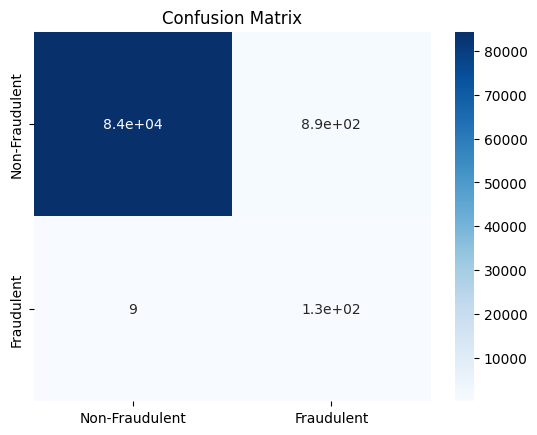

In [40]:
conf_matrix = confusion_matrix(y_test,y_pred)
sns.heatmap(conf_matrix, annot=True, cmap='Blues',
            xticklabels=['Non-Fraudulent', 'Fraudulent'],
            yticklabels=['Non-Fraudulent', 'Fraudulent'])
plt.title('Confusion Matrix')
plt.show();

In [41]:
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.9894666619851831


In [42]:
roc_auc_score(y_test,y_pred)

0.9616894500072057

## Feature Selection

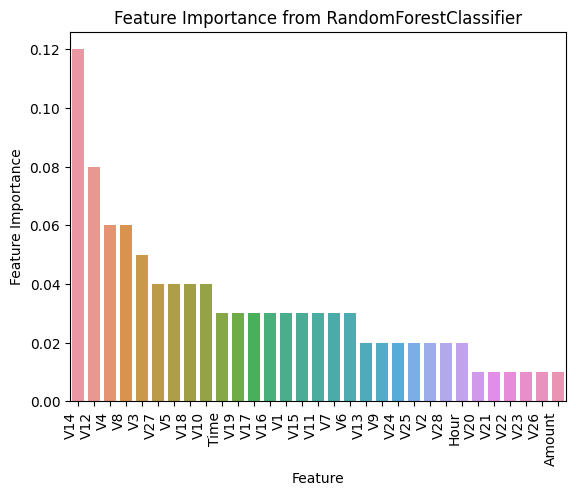

In [43]:
tmp = pd.DataFrame({'Feature': x_train.columns, 'Feature Importance' : clf.feature_importances_})
tmp = tmp.sort_values(by = 'Feature Importance', ascending = False)
top = tmp.head(12)
s = sns.barplot(x = 'Feature',y = 'Feature Importance', data = tmp)
plt.title('Feature Importance from RandomForestClassifier')
plt.xticks(rotation = 90, ha = 'right')
plt.show()

In [44]:
selected_features = top['Feature'].tolist()

# Select only the top features from the training set
x_train_selected = x_train[selected_features]

# Train the model using the selected features
clf.fit(x_train_selected, y_train)

AdaBoostClassifier(learning_rate=0.8, n_estimators=100, random_state=32)

In [45]:
x_test_selected = x_test[selected_features]
y_pred = clf.predict(x_test_selected)

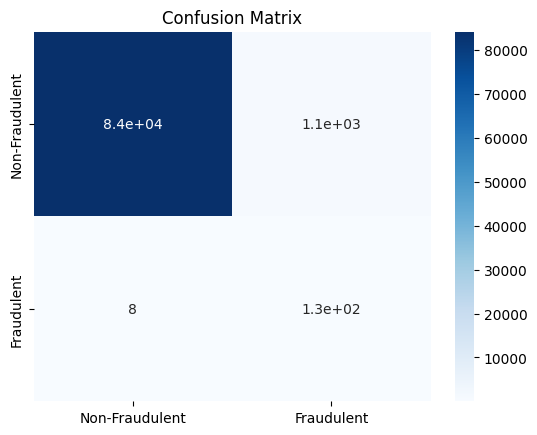

In [46]:
conf_matrix = confusion_matrix(y_test,y_pred)
sns.heatmap(conf_matrix, annot=True, cmap='Blues',
            xticklabels=['Non-Fraudulent', 'Fraudulent'],
            yticklabels=['Non-Fraudulent', 'Fraudulent'])
plt.title('Confusion Matrix')
plt.show();

In [47]:
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.9869620682794378


In [48]:
roc_auc_score(y_test,y_pred)

0.964105766094638

## Model 3:CatBoostClassifier

#### CatBoostClassifier is a gradient boosting for decision trees algorithm with support for handling categorical data

In [49]:
clf = CatBoostClassifier(iterations=500,
                             learning_rate=0.02,
                             depth=12,
                             eval_metric='AUC',
                             random_seed = 100,
                             bagging_temperature = 0.2,
                             od_type='Iter',
                             metric_period = 50,
                             od_wait=100)
clf.fit(x_train,y_train)

0:	total: 701ms	remaining: 5m 49s
50:	total: 30.9s	remaining: 4m 32s
100:	total: 1m 1s	remaining: 4m 3s
150:	total: 1m 31s	remaining: 3m 31s
200:	total: 2m	remaining: 2m 59s
250:	total: 2m 29s	remaining: 2m 28s
300:	total: 2m 58s	remaining: 1m 58s
350:	total: 3m 27s	remaining: 1m 27s
400:	total: 3m 55s	remaining: 58.2s
450:	total: 4m 24s	remaining: 28.7s
499:	total: 4m 52s	remaining: 0us


In [51]:
y_pred = clf.predict(x_test)

In [52]:
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.9992977774656788


In [53]:
roc_auc_score(y_test,y_pred)

0.94091857850435

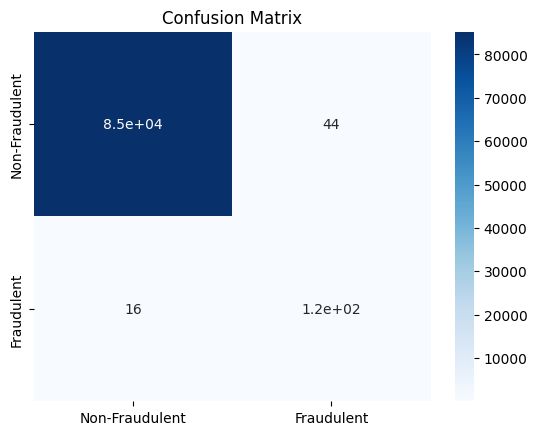

In [54]:
conf_matrix = confusion_matrix(y_test,y_pred)
sns.heatmap(conf_matrix, annot=True, cmap='Blues',
            xticklabels=['Non-Fraudulent', 'Fraudulent'],
            yticklabels=['Non-Fraudulent', 'Fraudulent'])
plt.title('Confusion Matrix')
plt.show();

## feature Selection

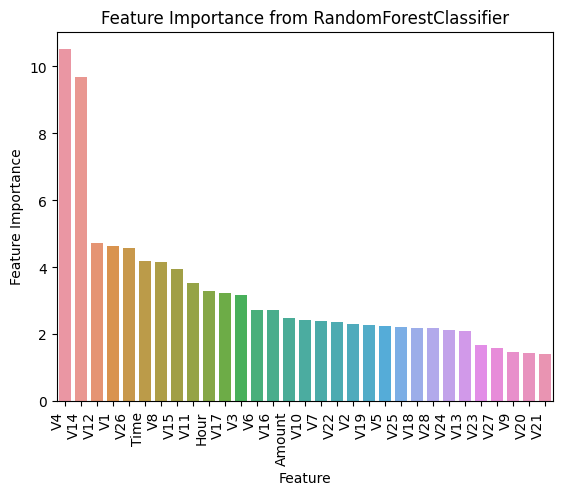

In [55]:
tmp = pd.DataFrame({'Feature': x_train.columns, 'Feature Importance' : clf.feature_importances_})
tmp = tmp.sort_values(by = 'Feature Importance', ascending = False)
top = tmp.head(12)
s = sns.barplot(x = 'Feature',y = 'Feature Importance', data = tmp)
plt.title('Feature Importance from RandomForestClassifier')
plt.xticks(rotation = 90, ha = 'right')
plt.show()

In [56]:
selected_features = top['Feature'].tolist()

# Select only the top features from the training set
x_train_selected = x_train[selected_features]

# Train the model using the selected features
clf.fit(x_train_selected, y_train)

0:	total: 345ms	remaining: 2m 52s
50:	total: 16.3s	remaining: 2m 23s
100:	total: 32.4s	remaining: 2m 7s
150:	total: 47.9s	remaining: 1m 50s
200:	total: 1m 3s	remaining: 1m 34s
250:	total: 1m 18s	remaining: 1m 17s
300:	total: 1m 33s	remaining: 1m 1s
350:	total: 1m 48s	remaining: 46s
400:	total: 2m 3s	remaining: 30.5s
450:	total: 2m 18s	remaining: 15s
499:	total: 2m 32s	remaining: 0us


In [57]:
x_test_selected = x_test[selected_features]
y_pred = clf.predict(x_test_selected)

In [58]:
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.9988764439450862


In [59]:
roc_auc_score(y_test,y_pred)

0.9480487946992833

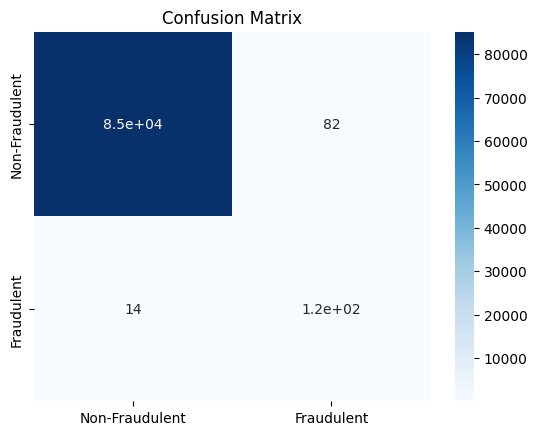

In [60]:
conf_matrix = confusion_matrix(y_test,y_pred)
sns.heatmap(conf_matrix, annot=True, cmap='Blues',
            xticklabels=['Non-Fraudulent', 'Fraudulent'],
            yticklabels=['Non-Fraudulent', 'Fraudulent'])
plt.title('Confusion Matrix')
plt.show();

## Model 4:LGBMClassifier

In [61]:
params = {
          'boosting_type': 'gbdt',
          'objective': 'binary',
          'metric':'auc',
          'learning_rate': 0.05,
          'num_leaves': 7,  
          'max_depth': 4,  
          'min_child_samples': 100,  
          'max_bin': 100,  
          'subsample': 0.9,  
          'subsample_freq': 1, 
          'colsample_bytree': 0.7, 
          'min_child_weight': 0,
          'min_split_gain': 0,
          'nthread': 8,
          'verbose': 0,
          'scale_pos_weight':150,
         }

clf = lgb.LGBMClassifier(**params)
clf.fit(x_train,y_train)

[LightGBM] [Warning] num_threads is set with nthread=8, will be overridden by n_jobs=-1. Current value: num_threads=-1
[LightGBM] [Warning] num_threads is set with nthread=8, will be overridden by n_jobs=-1. Current value: num_threads=-1
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.099700 seconds.
You can set `force_col_wise=true` to remove the overhead.


LGBMClassifier(colsample_bytree=0.7, learning_rate=0.05, max_bin=100,
               max_depth=4, metric='auc', min_child_samples=100,
               min_child_weight=0, min_split_gain=0, nthread=8, num_leaves=7,
               objective='binary', scale_pos_weight=150, subsample=0.9,
               subsample_freq=1, verbose=0)

In [62]:
y_pred = clf.predict(x_test)

In [63]:
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.7650480437250565


In [64]:
roc_auc_score(y_test,y_pred)

0.8713249085138176

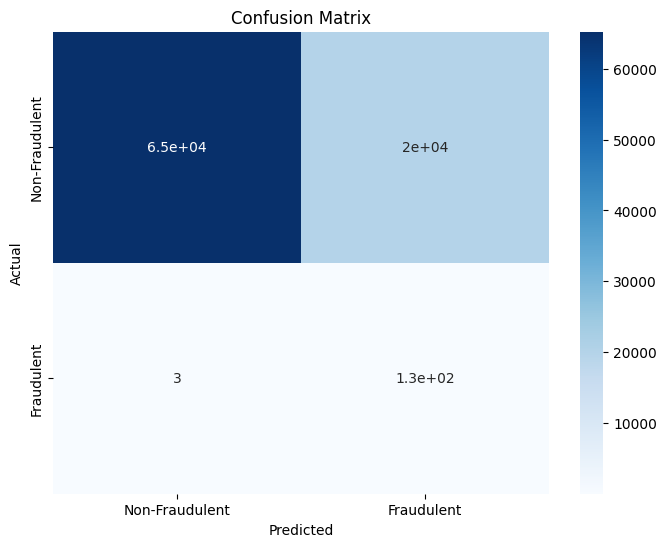

In [65]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues',
            xticklabels=['Non-Fraudulent', 'Fraudulent'],
            yticklabels=['Non-Fraudulent', 'Fraudulent'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## feature Selection

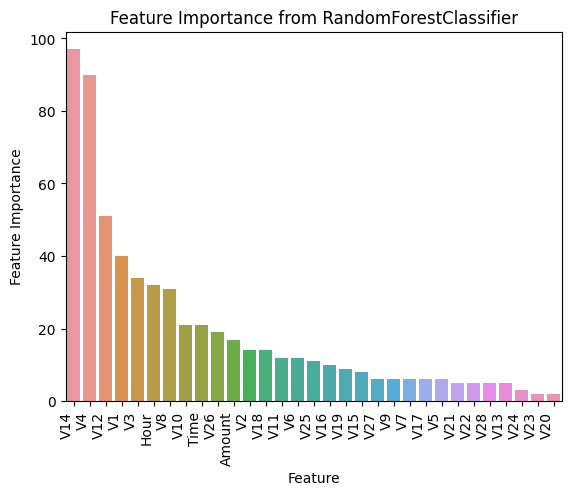

In [67]:
tmp = pd.DataFrame({'Feature': x_train.columns, 'Feature Importance' : clf.feature_importances_})
tmp = tmp.sort_values(by = 'Feature Importance', ascending = False)
top = tmp.head(12)
s = sns.barplot(x = 'Feature',y = 'Feature Importance', data = tmp)
plt.title('Feature Importance from RandomForestClassifier')
plt.xticks(rotation = 90, ha = 'right')
plt.show()

In [68]:
selected_features = top['Feature'].tolist()

# Select only the top features from the training set
x_train_selected = x_train[selected_features]

# Train the model using the selected features
clf.fit(x_train_selected, y_train)

[LightGBM] [Warning] num_threads is set with nthread=8, will be overridden by n_jobs=-1. Current value: num_threads=-1
[LightGBM] [Warning] num_threads is set with nthread=8, will be overridden by n_jobs=-1. Current value: num_threads=-1
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013584 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.


LGBMClassifier(colsample_bytree=0.7, learning_rate=0.05, max_bin=100,
               max_depth=4, metric='auc', min_child_samples=100,
               min_child_weight=0, min_split_gain=0, nthread=8, num_leaves=7,
               objective='binary', scale_pos_weight=150, subsample=0.9,
               subsample_freq=1, verbose=0)

In [69]:
x_test_selected = x_test[selected_features]
y_pred = clf.predict(x_test_selected)

In [70]:
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.7515653710660909


In [71]:
roc_auc_score(y_test,y_pred)

0.8645728248630035

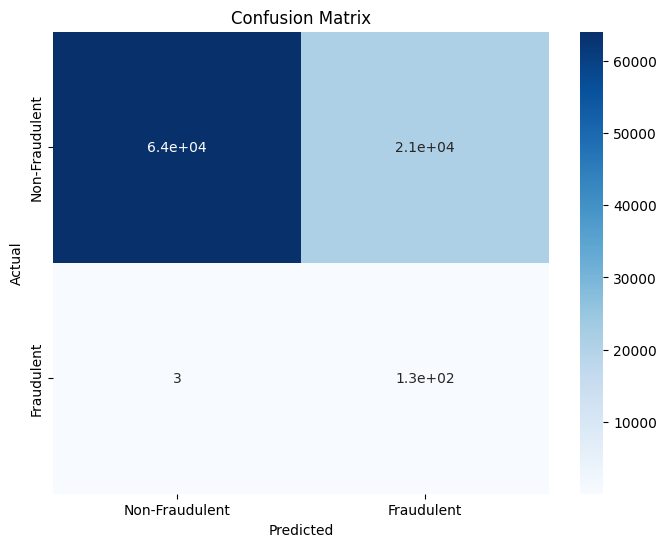

In [72]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues',
            xticklabels=['Non-Fraudulent', 'Fraudulent'],
            yticklabels=['Non-Fraudulent', 'Fraudulent'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Conclusion

### We investigated the data, checking for data unbalancing, visualizing the features and understanding the relationship between different features.

### We started with RandomForrestClassifier, for which we obtained an AUC scode of 0.93 when predicting the target for the test set.

### We followed with an AdaBoostClassifier model, with an AUC score of 0.96. After feature selection the model performs well.

### We then followed with an CatBoostClassifier, with the AUC score of 0.94, but the False Negetive got higher after feature selecyion.

### We then presented the data to a LightGBM model, and got AUC score of 0.87 before feature selection. After feature selection the performense get bad.

## The best model would be RandomForestClassifier.